In [218]:
# data manipulation libraries
import pandas as pd
import numpy as np

In [219]:
# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
# stats libraries
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [221]:
# ML libraries
from sklearn import metrics as m
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [222]:
# load boston data from sklearn
# NOTE: load_boston() returns dictionary
from sklearn.datasets import load_boston
boston = load_boston()

In [223]:
df = pd.DataFrame(data = boston.data, 
                  columns = boston.feature_names).join(pd.DataFrame(data = boston.target, 
                                                                    columns = ['Target']))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [249]:
# -- SCI-KIT LEARN --
# function to run linear regression fit on X and y data 
# returns model object
def make_lm(data, X_columns, target):
    X = data[X_columns]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    stuff = [lm, X_test, y_test]
    return stuff

In [225]:
# -- STATSMODELS --
# function to run Ordinary Least Squares fit on X and y data
# returns model object
def make_lm2(data, X_columns, target):
    X = data[X_columns]
    y = data[target]
    X2 = sm.add_constant(X)
    est = sm.OLS(y,X2)
    est2 = est.fit()
    return est2

In [ ]:
def col_prod(col1, col2):
    

In [226]:
# initial selection of all variables
# NOTE: we are going to take a backwards selection technique
X_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = 'Target'

In [227]:
# make both versions of linear model
# also prints summary of lm2
lm = make_lm(df, X_columns, target)
lm2 = make_lm2(df, X_columns, target)
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 20 Dec 2018   Prob (F-statistic):          6.95e-135
Time:                        20:34:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [228]:
# redefine X columns and remove ones with high P values
# first removing 'AGE' column
try:
    X_columns.remove('AGE')
except:
    print('Gone')

In [229]:
lm = make_lm(df, X_columns, target)
lm2 = make_lm2(df, X_columns, target)
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 20 Dec 2018   Prob (F-statistic):          6.28e-136
Time:                        20:34:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4666      5.081      7.177      0.0

In [250]:
# redefine X columns and remove ones with high P values
# first removing 'INDUS' column
try:
    X_columns.remove('INDUS')
    print('INDUS Removed')
except:
    print('Gone')

Gone


In [251]:
lm = make_lm(df, X_columns, target)
lm2 = make_lm2(df, X_columns, target)
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 20 Dec 2018   Prob (F-statistic):          5.74e-137
Time:                        20:42:00   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3694      5.069      7.176      0.0

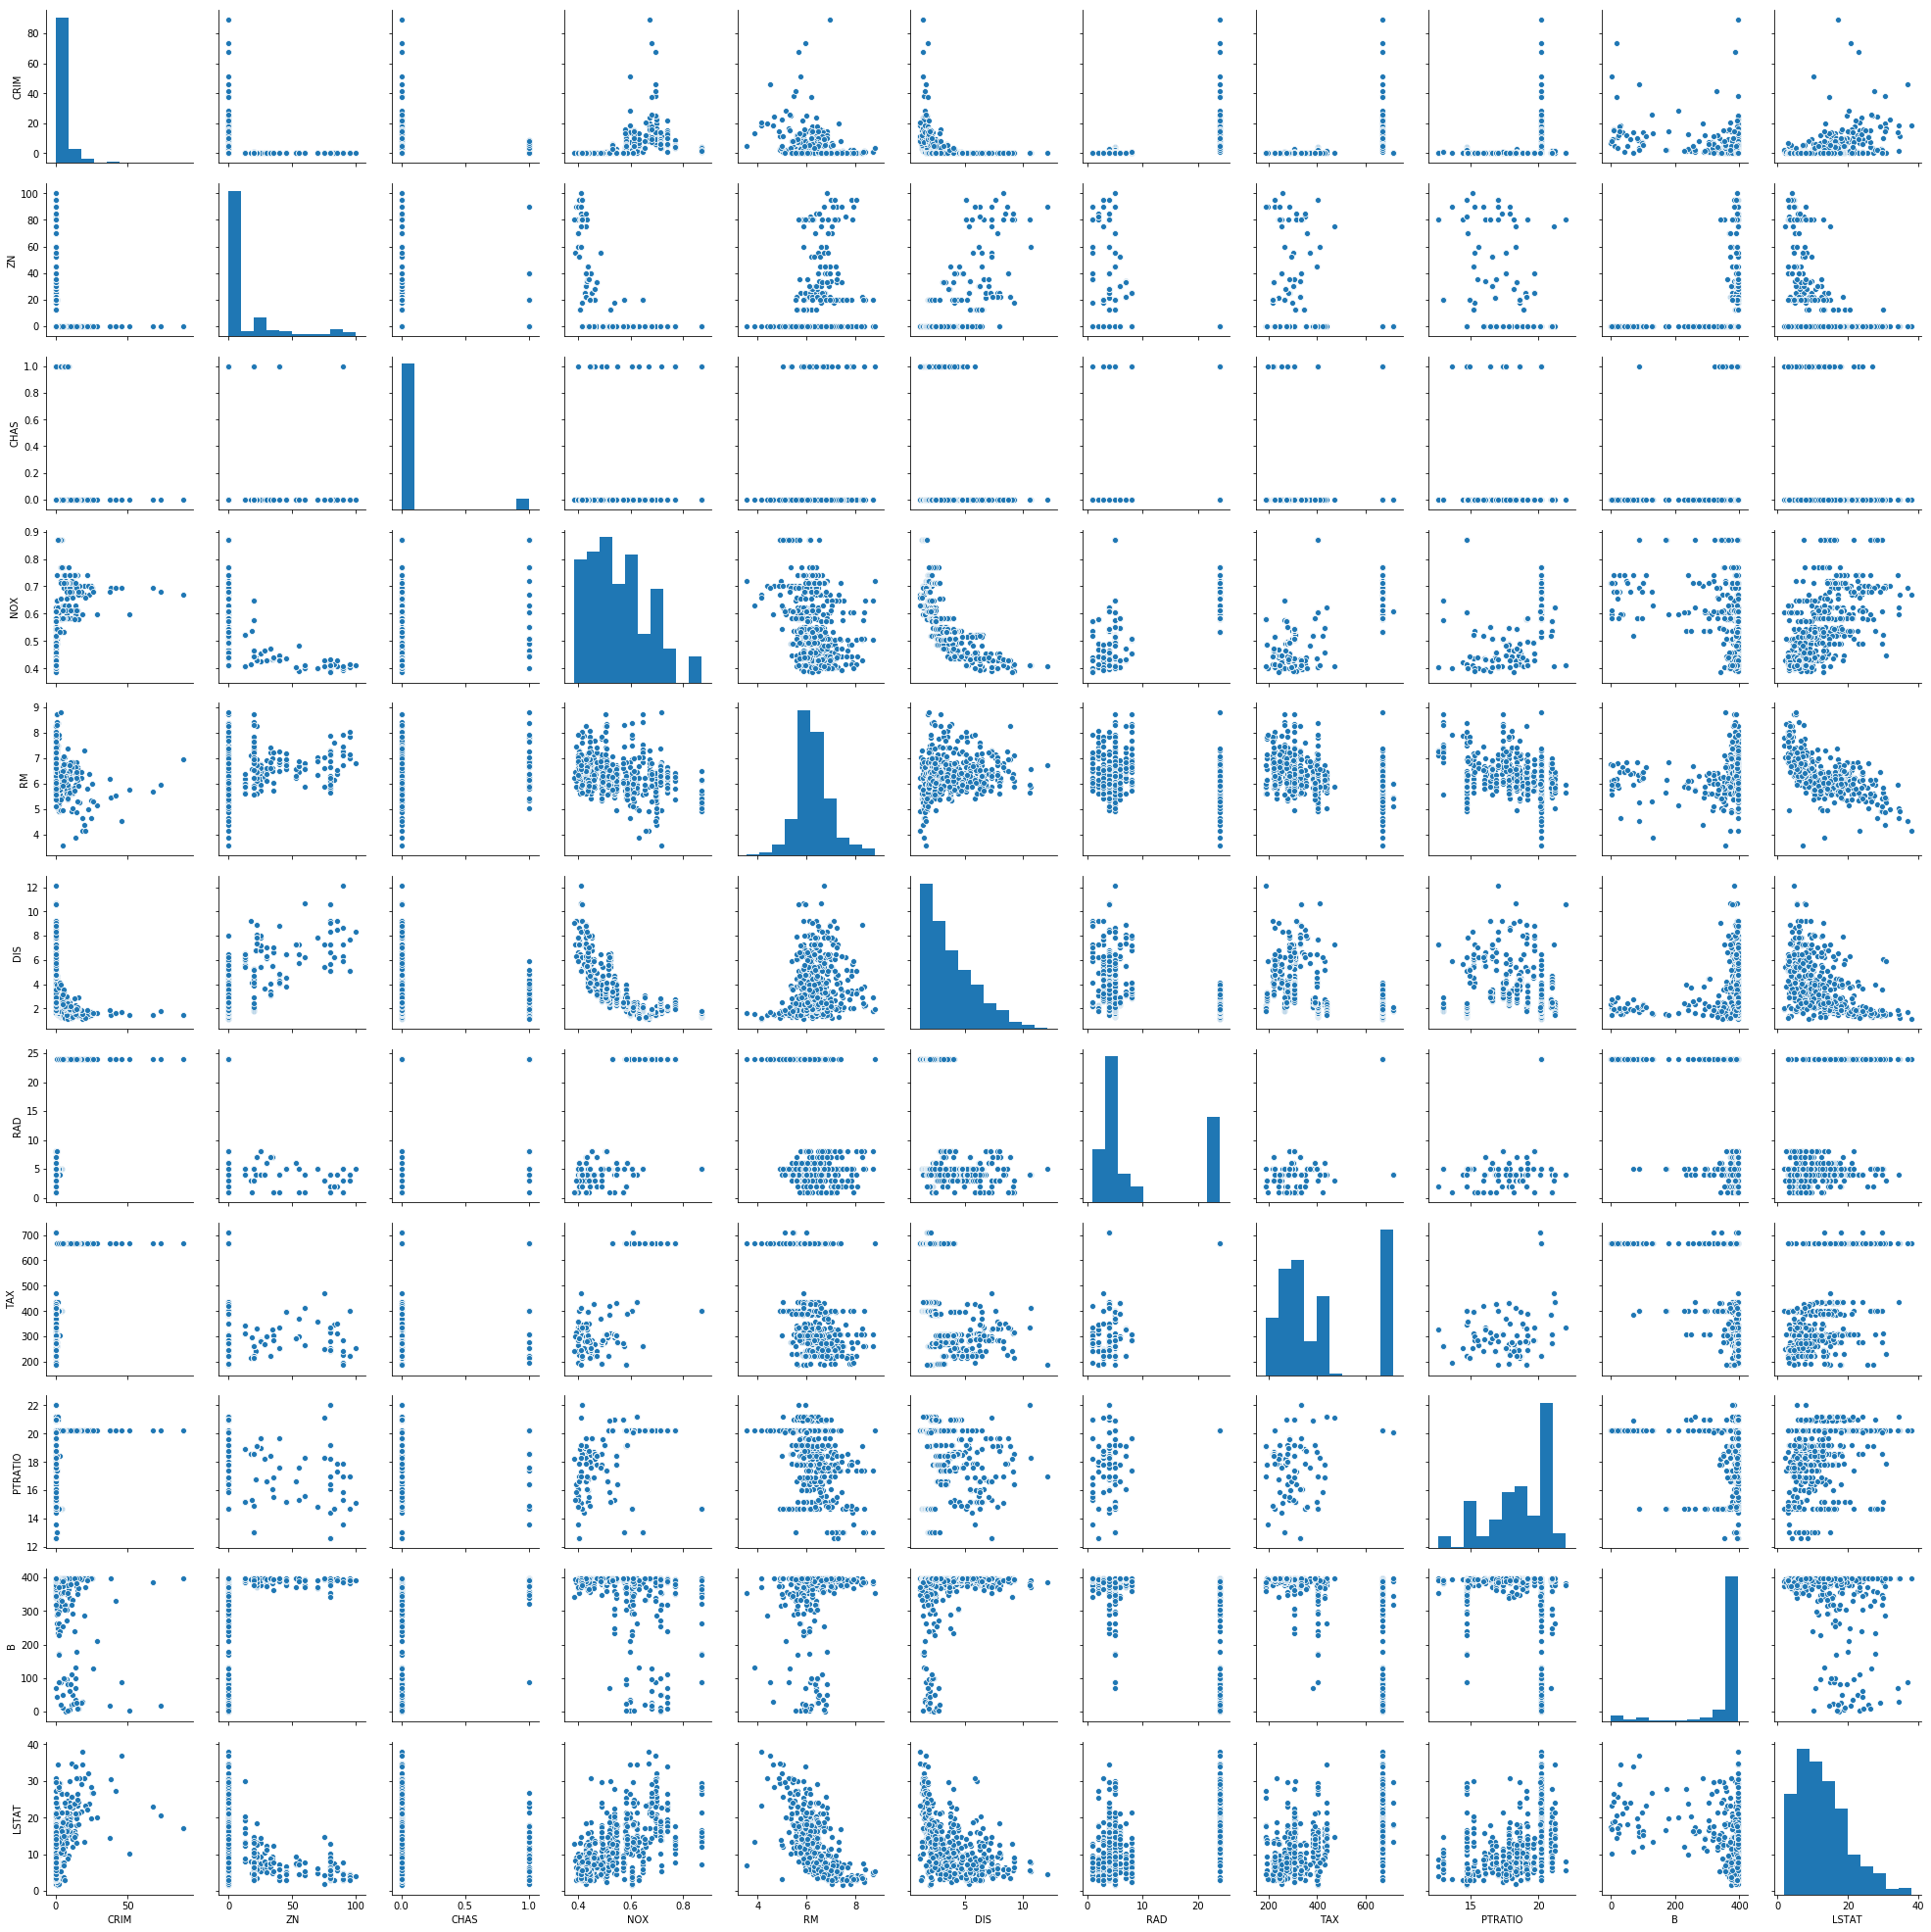

In [257]:
sns.pairplot(df[X_columns])

In [253]:
predictions = lm[0].predict(lm[1])

/Users/srauner/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


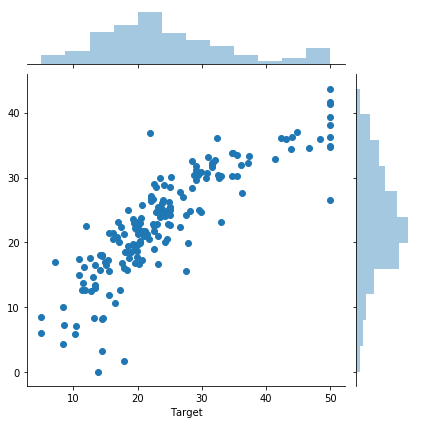

In [254]:
sns.jointplot(x = lm[2], y = predictions)

In [208]:
for i in range (len(X_columns) - 1):
    X_columns.append(X_columns[i] + " * " + X_columns[i+1])

In [209]:
for el in X_columns:
    print(el)

CRIM
ZN
CHAS
NOX
RM
DIS
RAD
TAX
PTRATIO
B
LSTAT
CRIM * ZN
ZN * CHAS
CHAS * NOX
NOX * RM
RM * DIS
DIS * RAD
RAD * TAX
TAX * PTRATIO
PTRATIO * B
B * LSTAT


In [212]:
for el in X_columns:
    if (len(el.split()) == 1):
        continue
    else:
        df[el] = df[el.split()[0]] * df[el.split()[-1]]
        
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CRIM * ZN,ZN * CHAS,CHAS * NOX,NOX * RM,RM * DIS,DIS * RAD,RAD * TAX,TAX * PTRATIO,PTRATIO * B,B * LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0.11376,0.0,0.0,3.537350,26.891750,4.0900,296.0,4528.8,6072.570,1976.5620
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.00000,0.0,0.0,3.011449,31.893749,9.9342,484.0,4307.6,7064.820,3627.6660
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,0.00000,0.0,0.0,3.369765,35.688614,9.9342,484.0,4307.6,6992.374,1583.1049
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,0.00000,0.0,0.0,3.205084,42.423276,18.1866,666.0,4151.4,7379.581,1160.2122
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.00000,0.0,0.0,3.273326,43.326543,18.1866,666.0,4151.4,7422.030,2115.4770


In [90]:
predictions = lm.predict(X_test)

In [214]:
lin = make_lm2(df, X_columns, target)
lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     82.65
Date:                Thu, 20 Dec 2018   Prob (F-statistic):          3.95e-145
Time:                        20:28:30   Log-Likelihood:                -1454.9
No. Observations:                 506   AIC:                             2954.
Df Residuals:                     484   BIC:                             3047.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -29.3425     26.249     -1.118      0.264     -80.918      22.233
CRIM             -0.1533      0.032     -4.767      0.000      -0.217      -0.090
ZN               -0.0100      0.015     -0.673      0.501      -0.039       0.019
CHAS              6.2546      4.103      1.524      0.128      -1.807      14.316
NOX             117.9466     26.429      4.463      0.000      66.017     169.876
RM               16.0488      3.141      5.110      0.000       9.878      22.220
DIS              -1.3176      1.561     -0.844      0.399      -4.385       1.750
RAD               0.8779      0.348      2.526      0.012       0.195       1.561
TAX              -0.0703      0.031     -2.280      0.023      -0.131      -0.010
PTRATIO          -1.9674      0.922     -2.134      0.033      -3.779      -0.156
B                 0.0169      0.033      0.516      0.606      -0.047       0.081
LSTAT            -0.2873      0.131     -2.199      0.028      -0.544      -0.031
CRIM * ZN         0.3156      0.122      2.587      0.010       0.076       0.555
ZN * CHAS        -0.0648      0.049     -1.335      0.182      -0.160       0.031
CHAS * NOX       -4.5302      6.514     -0.695      0.487     -17.330       8.270
NOX * RM        -21.9047      4.307     -5.086      0.000     -30.366     -13.443
RM * DIS          0.0872      0.244      0.357      0.721      -0.392       0.567
DIS * RAD        -0.0960      0.032     -3.026      0.003      -0.158      -0.034
RAD * TAX        -0.0007      0.000     -1.490      0.137      -0.002       0.000
TAX * PTRATIO     0.0035      0.002      2.099      0.036       0.000       0.007
PTRATIO * B       0.0003      0.002      0.164      0.870      -0.003       0.004
B * LSTAT        -0.0008      0.000     -2.140      0.033      -0.001   -6.32e-05
==============================================================================
Omnibus:                      178.572   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.099
Skew:                           1.519   Prob(JB):                    3.01e-174
Kurtosis:                       8.355   Cond. No.                     2.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
coef = pd.DataFrame(lm[0].coef_, X_columns, columns = ['Coeff'])
coef

,Coeff
CRIM,-0.090009
ZN,0.038462
CHAS,3.355902
NOX,-15.330234
RM,3.275350
DIS,-1.341506
RAD,0.239330
TAX,-0.009411
PTRATIO,-0.905387
B,0.007010


In [120]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 20 Dec 2018   Prob (F-statistic):          6.95e-135
Time:                        18:15:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

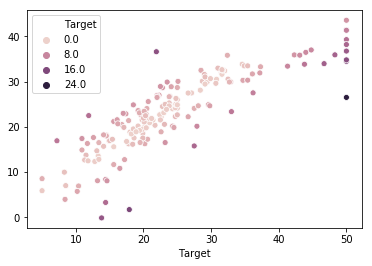

In [115]:
plt = sns.scatterplot(x = y_test,
                      y = predictions,
                      hue = abs(y_test - predictions))

/Users/srauner/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/srauner/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/Users/srauner/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/Users/srauner/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, whi

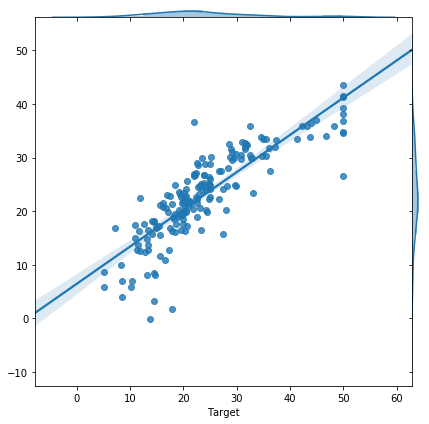

In [116]:
grid = sns.jointplot(x = y_test, 
                     y = predictions, 
                     space=0, 
                     size=6, 
                     ratio=50,
                     kind = 'reg')
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 4], [1.5, 0], linewidth=2)

In [98]:
MAE = m.mean_absolute_error(y_test, predictions)
MSE = m.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

In [102]:
print('MAE = {}\nMSE = {}\nRMSE = {}'.format(MAE,MSE,RMSE))

MAE = 3.8254119168200957
MSE = 29.217450297399285
RMSE = 5.40531685448682


[2, 3, 4]
None
